In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

import matplotlib.pyplot as plt


# Sample data (you can replace this with your actual data)
x = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0]).view(-1, 1)  # Features (input), reshaped to be a batch of 1
y = torch.tensor([2.0, 4.0, 6.0, 8.0, 10.0]).view(-1, 1)  # Target values, reshaped to be a batch of 1

# Adding Gaussian noise to the labels
mean = 0.0      # Mean of the Gaussian noise
stddev = 0.5    # Standard deviation of the Gaussian noise
noise = torch.normal(mean, stddev, size=y.shape)  # Generate Gaussian noise with the same shape as y
y_noisy = y + noise  # Add the noise to the labels

# Create a TensorDataset and DataLoader for batching and shuffling
dataset = TensorDataset(x, y_noisy)  # Use y_noisy instead of y for noisy labels
train_loader = DataLoader(dataset, batch_size=1, shuffle=True)

# Define the model with a single weight parameter 'u' and 'w'
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        # Initialize parameters 'u' and 'w' as learnable parameters
        self.u = nn.Parameter(torch.randn(1))  # u will be initialized randomly
        self.w = nn.Parameter(torch.randn(1))  # w will be initialized randomly

    def forward(self, x):
        return self.u * self.w * x  # uwx

# Instantiate the model
model = Model()

# Define the loss function (Mean Squared Error)
loss_fn = nn.MSELoss()

# Define the optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.015)

# Training loop
num_epochs = 1000
weights = []

for epoch in range(num_epochs):
    for x_batch, y_batch in train_loader:
        # Forward pass
        y_pred = model(x_batch)

        # Compute the loss
        loss = loss_fn(y_pred, y_batch)

        # Zero the gradients before backward pass
        optimizer.zero_grad()

        # Backward pass (compute gradients)
        loss.backward()

        # Update parameters
        optimizer.step()

    # Print the loss every 100 epochs

    weights.append([model.u.item(), model.w.item()])
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

# After training, you can print the learned parameters
print(f'Learned parameter u: {model.u.item()}')
print(f'Learned parameter w: {model.w.item()}')


Epoch [100/1000], Loss: 0.009839270263910294
Epoch [200/1000], Loss: 0.29692062735557556
Epoch [300/1000], Loss: 0.05887579917907715
Epoch [400/1000], Loss: 0.08271131664514542
Epoch [500/1000], Loss: 0.01829233020544052
Epoch [600/1000], Loss: 0.19037748873233795
Epoch [700/1000], Loss: 0.29400575160980225
Epoch [800/1000], Loss: 0.5203942656517029
Epoch [900/1000], Loss: 0.2652789056301117
Epoch [1000/1000], Loss: 0.21634799242019653
Learned parameter u: -1.4726037979125977
Learned parameter w: -1.4726037979125977


In [2]:
weights = np.array(weights)

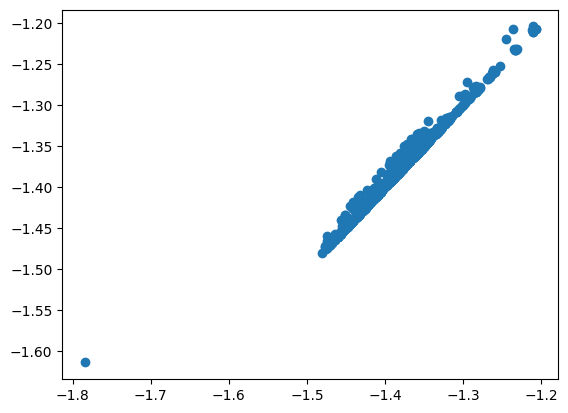

In [3]:
plt.scatter(weights[:, 0], weights[:,1])

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the plot
x_vals = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0]).view(-1, 1)  # Input values
y_vals = torch.tensor([2.0, 4.0, 6.0, 8.0, 10.0]).view(-1, 1)  # Target values

# Define the loss function
def loss_function(u, w, x_vals, y_vals):
    return torch.sum((u * w * x_vals - y_vals) ** 2)

# Create a meshgrid for u and w values
u_range = np.linspace(0, 2, 200)  # Range for u (from -2 to 2)
w_range = np.linspace(0, 2, 200)  # Range for w (from -2 to 2)
u_grid, w_grid = np.meshgrid(u_range, w_range)  # Create a meshgrid

# Convert the grid to torch tensors for calculation
u_grid_tensor = torch.tensor(u_grid, dtype=torch.float32)
w_grid_tensor = torch.tensor(w_grid, dtype=torch.float32)

# Initialize a matrix to hold the loss values
loss_values = np.zeros(u_grid.shape)

# Calculate the loss for each (u, w) pair in the meshgrid
for i in range(u_grid.shape[0]):
    for j in range(u_grid.shape[1]):
        u = u_grid_tensor[i, j]
        w = w_grid_tensor[i, j]
        loss_values[i, j] = loss_function(u, w, x_vals, y_vals).item()

# Plot the equipotential lines (contours)



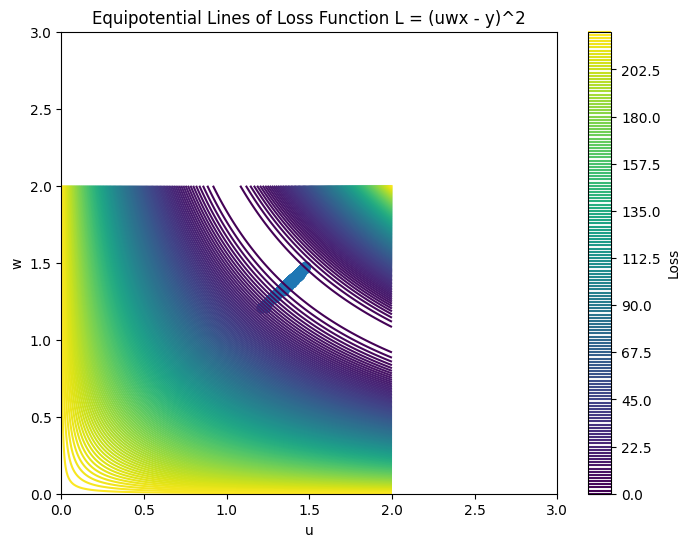

In [5]:
plt.figure(figsize=(8, 6))
plt.contour(u_grid, w_grid, loss_values, levels=200, cmap='viridis')
plt.colorbar(label="Loss")
plt.xlabel('u')
plt.ylabel('w')
plt.title('Equipotential Lines of Loss Function L = (uwx - y)^2')

plt.scatter(np.abs(weights[:, 0]), np.abs(weights[:,1]))
plt.xlim(0, 3)
plt.ylim(0,3)
plt.show()

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Sample data (you can replace this with your actual data)
x = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0]).view(-1, 1)  # Features (input), reshaped to be a batch of 1
y = torch.tensor([2.0, 4.0, 6.0, 8.0, 10.0]).view(-1, 1)  # Target values, reshaped to be a batch of 1

# Define the model with a single weight parameter 'u' and 'w'
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        # Initialize parameters 'u' and 'w' as learnable parameters
        self.u = nn.Parameter(torch.randn(1))  # u will be initialized randomly
        self.w = nn.Parameter(torch.randn(1))  # w will be initialized randomly

    def forward(self, x):
        return self.u * self.w * x  # uwx

# Define the loss function
def loss_function(u, w, x_vals, y_vals):
    return torch.sum((u * w * x_vals - y_vals) ** 2)

# Instantiate the model
model = Model()

# Define the optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.003)

# Define the noise parameters (mean and standard deviation)
mean = 0.0      # Mean of the Gaussian noise
stddev = 10   # Standard deviation of the Gaussian noise (controls noise strength)

# Training loop with additive Gaussian noise in the gradients
num_epochs = 2000

weights_gaussian = []

for epoch in range(num_epochs):
    for x_batch, y_batch in zip(x, y):
        # Forward pass
        y_pred = model(x_batch.view(1, 1))

        # Compute the loss
        loss = loss_function(model.u, model.w, x, y)

        # Zero the gradients before backward pass
        optimizer.zero_grad()

        # Backward pass (compute gradients)
        loss.backward()

        # Add Gaussian noise to the gradients before the optimizer step
        with torch.no_grad():
            # Add Gaussian noise to the gradients
            noise_u = torch.normal(mean=mean, std=stddev, size=model.u.grad.shape)
            noise_w = torch.normal(mean=mean, std=stddev, size=model.w.grad.shape)

            # Perturb the gradients with the noise
            model.u.grad += noise_u
            model.w.grad += noise_w

        # Update parameters
        optimizer.step()
    weights_gaussian.append([model.u.item(), model.w.item()])

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

# After training, you can print the learned parameters
print(f'Learned parameter u: {model.u.item()}')
print(f'Learned parameter w: {model.w.item()}')


Epoch [100/2000], Loss: 2.0210227966308594
Epoch [200/2000], Loss: 0.3585483133792877
Epoch [300/2000], Loss: 0.010529987514019012
Epoch [400/2000], Loss: 0.11276169121265411
Epoch [500/2000], Loss: 0.005294029600918293
Epoch [600/2000], Loss: 0.6410446166992188
Epoch [700/2000], Loss: 0.20944926142692566
Epoch [800/2000], Loss: 0.05883429944515228
Epoch [900/2000], Loss: 0.3938998579978943
Epoch [1000/2000], Loss: 0.019335856661200523
Epoch [1100/2000], Loss: 0.13985037803649902
Epoch [1200/2000], Loss: 0.5698692798614502
Epoch [1300/2000], Loss: 0.004515296779572964
Epoch [1400/2000], Loss: 0.17912906408309937
Epoch [1500/2000], Loss: 0.3822159171104431
Epoch [1600/2000], Loss: 0.0934285819530487
Epoch [1700/2000], Loss: 0.8977832198143005
Epoch [1800/2000], Loss: 0.5213931798934937
Epoch [1900/2000], Loss: 0.009115196764469147
Epoch [2000/2000], Loss: 0.2290600687265396
Learned parameter u: -1.205093264579773
Learned parameter w: -1.6311264038085938


In [7]:
weights_gaussian = np.array(weights_gaussian)

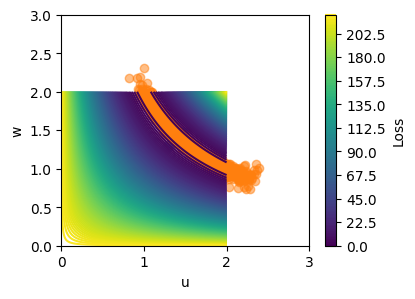

In [8]:
plt.figure(figsize=(4, 3))
plt.contour(u_grid, w_grid, loss_values, levels=200, cmap='viridis')
plt.colorbar(label="Loss")
plt.xlabel('u')
plt.ylabel('w')
#plt.title('Equipotential Lines of Loss Function L = (uwx - y)^2')

plt.scatter(np.abs(weights[500:, 0]), np.abs(weights[500:,1]), alpha=0.5)
plt.scatter(np.abs(weights_gaussian[500:, 0]), np.abs(weights_gaussian[500:,1]), alpha=0.5)

plt.xlim(0, 3)
plt.ylim(0,3)
plt.show()

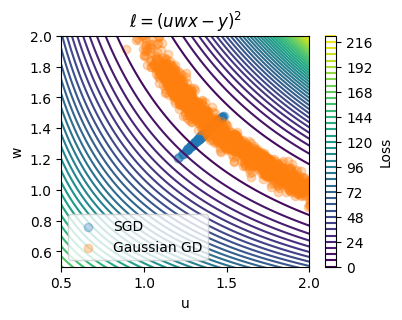

In [9]:
plt.figure(figsize=(4, 3))
plt.contour(u_grid, w_grid, loss_values, levels=40, cmap='viridis')
plt.colorbar(label="Loss")
plt.xlabel('u')
plt.ylabel('w')
plt.title(r'$\ell = (uwx - y)^2$')

plt.scatter(np.abs(weights[500:, 0]), np.abs(weights[500:,1]), alpha=0.3, label='SGD')
plt.scatter(np.abs(weights_gaussian[500:, 0]), np.abs(weights_gaussian[500:,1]), alpha=0.3, label='Gaussian GD')

plt.xlim(0.5, 2)
plt.ylim(0.5,2)
plt.legend()

plt.savefig('distribution.png', dpi=300, bbox_inches='tight')

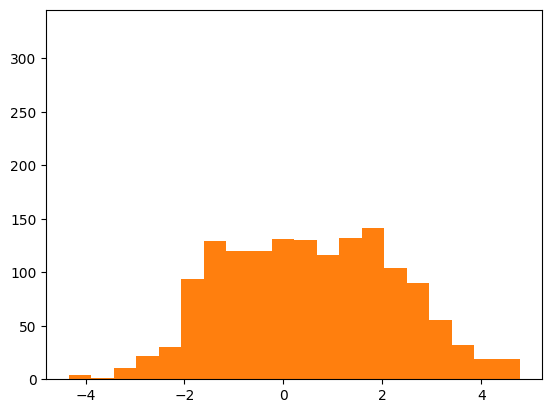

In [10]:
plt.hist(np.abs(weights[500:, 0]) ** 2 - np.abs(weights[500:,1]**2))
_, bins,_ = plt.hist(np.abs(weights_gaussian[500:, 0]) ** 2 - np.abs(weights_gaussian[500:,1]**2), bins=20)


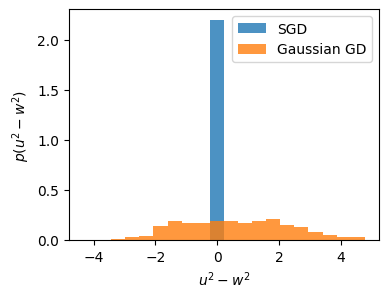

In [11]:
plt.figure(figsize=(4, 3))


plt.hist(np.abs(weights[500:, 0]) ** 2 - np.abs(weights[500:,1]**2), bins=bins,alpha=0.8, density=True,label='SGD')
plt.hist(np.abs(weights_gaussian[500:, 0]) ** 2 - np.abs(weights_gaussian[500:,1]**2),alpha=0.8, bins=bins, density=True, label='Gaussian GD')
plt.ylabel(r'$p(u^2 - w^2)$')
plt.xlabel(r'$u^2 - w^2$')
plt.legend()
plt.savefig('distribution-noether.png', dpi=300, bbox_inches='tight')